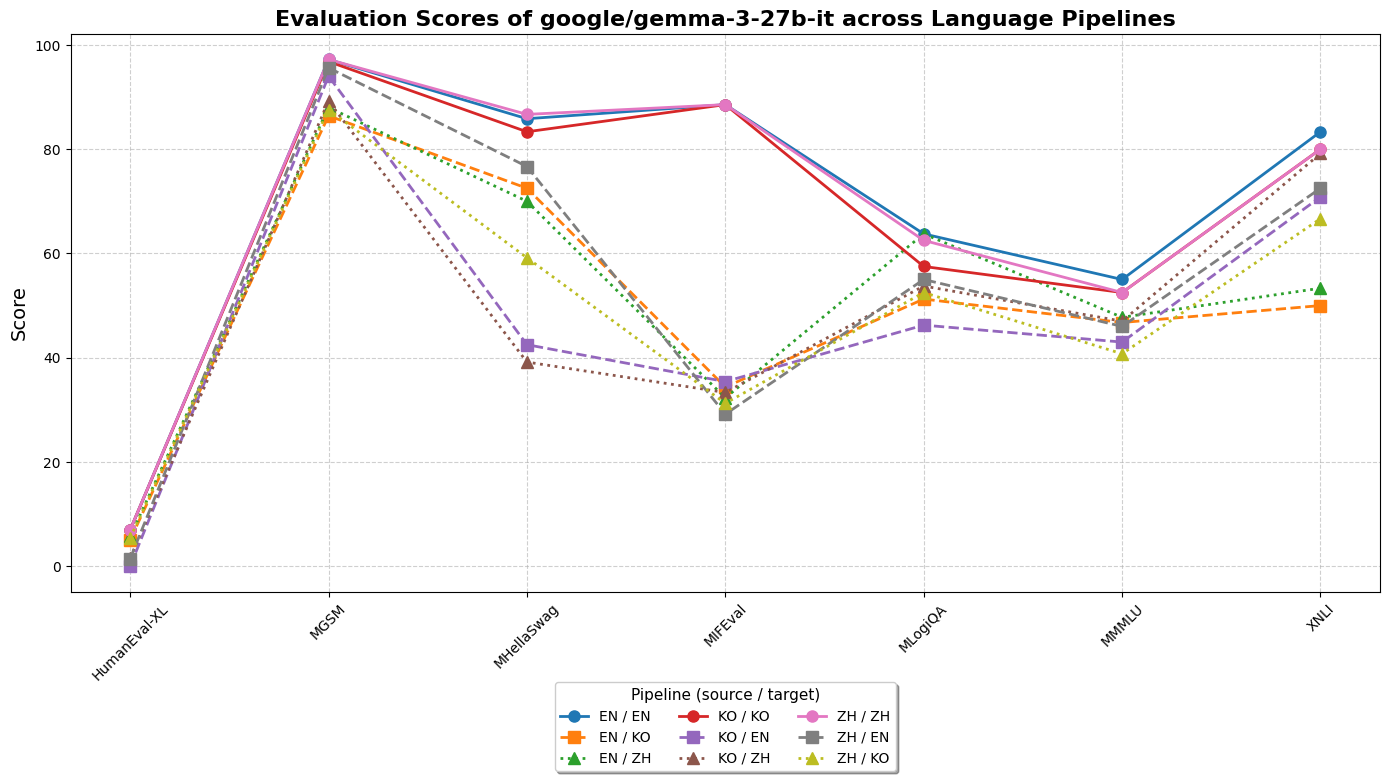

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    "Evaluation": ["HumanEval-XL", "MGSM", "MHellaSwag", "MIFEval", "MLogiQA", "MMMLU", "XNLI"],
    "EN / EN": [6.97, 97.2, 85.8333, 88.54, 63.75, 55, 83.3333],
    "EN / KO": [5.1, 86.4, 72.5, 34.38, 51.25, 46.75, 50],
    "EN / ZH": [5.72, 88, 70, 32.29, 63.75, 47.75, 53.3333],
    
    "KO / KO": [6.97, 96.8, 83.33, 88.54, 57.5, 52.5, 80],
    "KO / EN": [0.02, 94, 42.5, 35.42, 46.25, 43, 70.8333],
    "KO / ZH": [1.56, 89.2, 39.166, 33.33, 53.75, 47, 79.1667],

    "ZH / ZH": [6.979, 97.2, 86.6667, 88.54, 62.5, 52.5, 80],
    "ZH / EN": [1.458, 95.6, 76.6667, 29.17, 55, 46, 72.5],
    "ZH / KO": [5.416, 87.6, 59.1667, 31.25, 52.5, 40.75, 66.6667],
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
markers    = ['o', 's', '^', 'o', 's', '^', 'o', 's', '^']
linestyles = ['-', '--', ':', '-', '--', ':', '-', '--', ':']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

columns_to_plot = [col for col in df.columns if col != 'Evaluation']

for i, col in enumerate(columns_to_plot):
    plt.plot(df['Evaluation'], df[col], label=col, marker=markers[i % len(markers)],
             linestyle=linestyles[i % len(linestyles)], linewidth=2, markersize=8, color=colors[i % len(colors)])

plt.title("Evaluation Scores of google/gemma-3-27b-it across Language Pipelines", fontsize=16, fontweight='bold')
plt.xlabel("Task", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Pipeline (source / target)", fontsize=10, title_fontsize=11, loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=3, frameon=True, shadow=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


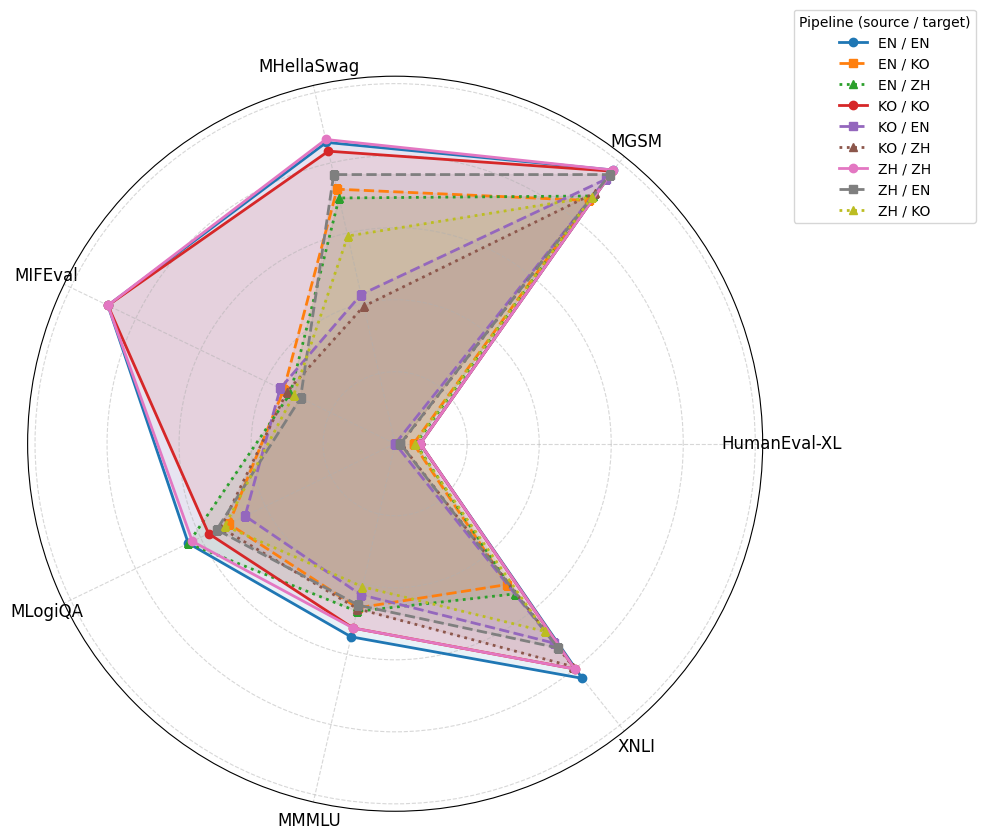

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Radar chart setup
def make_radar_chart(df, categories, labels, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, label in enumerate(labels):
        values = df[label].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, label=label, linewidth=2, linestyle=linestyles[i % len(linestyles)],
                marker=markers[i % len(markers)], color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

    # ax.set_title(title, size=18, weight='bold', y=1.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_yticklabels([])
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10, title="Pipeline (source / target)")

    plt.tight_layout()
    plt.show()

# Plot radar chart
categories = df['Evaluation'].tolist()
labels = [col for col in df.columns if col != 'Evaluation']
make_radar_chart(df, categories, labels, "Results of P-MMEval Evaluation on different Language Pipelines")


In [1]:
# rescoring
import json
import os

english_related_keys = {
    "combination:repeat_prompt",
    "combination:two_responses",
    "detectable_content:number_placeholders",
    "detectable_content:postscript",
    "detectable_format:constrained_response",
    "detectable_format:json_format",
    "detectable_format:number_bullet_lists",
    "detectable_format:number_highlighted_sections",
    "detectable_format:title",
    "keywords:forbidden_words",
    "length_constraints:nth_paragraph_first_word",
    "length_constraints:number_paragraphs",
    "length_constraints:number_sentences",
    "length_constraints:number_words",
    "punctuation:no_comma",
    "startend:end_checker",
    "startend:quotation"
}

def rescoring(folder: str, including_set: set):
    with open(os.path.join(folder, "score.json"), "r") as f:
        ifeval_result = json.load(f)
        
    # Get all tier1 accuracy scores
    tier1_scores = ifeval_result["loose"]["tier1_instruction_accuracy"]

    # Filter out English-related subcategories
    filtered_scores = {
        k: v for k, v in tier1_scores.items() if k in including_set
    }
    
    # Calculate average of filtered scores
    average_filtered_score = sum(filtered_scores.values()) / len(filtered_scores)

    # Display results
    print("Tier1 Scores (excluding English-related subcategories):")
    for k, v in filtered_scores.items():
        print(f"  {k}: {v:.4f}")

    print(f"\n➡️ Average Score (Non-English Tier1): {average_filtered_score*100:.4f}")
    

    


In [2]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0244
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3462
  detectable_format:constrained_response: 0.0000
  detectable_format:json_format: 0.3529
  detectable_format:number_bullet_lists: 0.3548
  detectable_format:number_highlighted_sections: 0.6250
  detectable_format:title: 0.1892
  keywords:forbidden_words: 0.7755
  length_constraints:nth_paragraph_first_word: 0.2500
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.4808
  length_constraints:number_words: 0.4808
  punctuation:no_comma: 0.1364
  startend:end_checker: 0.0385
  startend:quotation: 0.0976

➡️ Average Score (Non-English Tier1): 29.0535


In [3]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/en",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.6341
  combination:two_responses: 1.0000
  detectable_content:number_placeholders: 0.8148
  detectable_content:postscript: 0.9615
  detectable_format:constrained_response: 1.0000
  detectable_format:json_format: 0.7059
  detectable_format:number_bullet_lists: 0.7419
  detectable_format:number_highlighted_sections: 0.8333
  detectable_format:title: 1.0000
  keywords:forbidden_words: 0.8571
  length_constraints:nth_paragraph_first_word: 0.8333
  length_constraints:number_paragraphs: 0.7778
  length_constraints:number_sentences: 0.8462
  length_constraints:number_words: 0.9231
  punctuation:no_comma: 0.9242
  startend:end_checker: 0.8462
  startend:quotation: 0.9268

➡️ Average Score (Non-English Tier1): 86.0365


In [4]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/ko",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0000
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.1852
  detectable_content:postscript: 0.3846
  detectable_format:constrained_response: 0.1000
  detectable_format:json_format: 0.1765
  detectable_format:number_bullet_lists: 0.2258
  detectable_format:number_highlighted_sections: 0.5000
  detectable_format:title: 0.1351
  keywords:forbidden_words: 0.7143
  length_constraints:nth_paragraph_first_word: 0.0833
  length_constraints:number_paragraphs: 0.0741
  length_constraints:number_sentences: 0.4423
  length_constraints:number_words: 0.5385
  punctuation:no_comma: 0.2576
  startend:end_checker: 0.0385
  startend:quotation: 0.0488

➡️ Average Score (Non-English Tier1): 23.4582


In [5]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh-tw",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0000
  combination:two_responses: 0.0417
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3077
  detectable_format:constrained_response: 0.1000
  detectable_format:json_format: 0.0588
  detectable_format:number_bullet_lists: 0.2258
  detectable_format:number_highlighted_sections: 0.4583
  detectable_format:title: 0.1622
  keywords:forbidden_words: 0.7959
  length_constraints:nth_paragraph_first_word: 0.0000
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.5577
  length_constraints:number_words: 0.5962
  punctuation:no_comma: 0.1212
  startend:end_checker: 0.1154
  startend:quotation: 0.0488

➡️ Average Score (Non-English Tier1): 25.2553


In [6]:
rescoring(
    "/work/u5110390/BenchWeaver/score/main_pipeline/ifeval/zh",
    including_set=english_related_keys
)

Tier1 Scores (excluding English-related subcategories):
  combination:repeat_prompt: 0.0244
  combination:two_responses: 0.0833
  detectable_content:number_placeholders: 0.4815
  detectable_content:postscript: 0.3462
  detectable_format:constrained_response: 0.0000
  detectable_format:json_format: 0.3529
  detectable_format:number_bullet_lists: 0.3548
  detectable_format:number_highlighted_sections: 0.6250
  detectable_format:title: 0.1892
  keywords:forbidden_words: 0.7755
  length_constraints:nth_paragraph_first_word: 0.2500
  length_constraints:number_paragraphs: 0.2222
  length_constraints:number_sentences: 0.4808
  length_constraints:number_words: 0.4808
  punctuation:no_comma: 0.1364
  startend:end_checker: 0.0385
  startend:quotation: 0.0976

➡️ Average Score (Non-English Tier1): 29.0535


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_graph(ax, columns, df, title):
    # Radar chart axes
    df_radar = df.dropna(subset=columns)

    # Compute angles
    num_vars = len(columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Initialize radar chart
    colors = plt.cm.tab20.colors
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)

    # Plot each template
    for i, row in df_radar.iterrows():
        values = [row[metric] for metric in columns]
        values += values[:1]
        ax.plot(angles, values, label=row["Template Name"], linewidth=1.5, color=colors[i % len(colors)])
        ax.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

    # Configure axes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(columns, fontsize=12)
    ax.set_title(title, size=16, pad=20)
    ax.grid(True)
    ax.tick_params(axis='y', labelsize=8)

def plot_radar_subgraphs(df_list, columns, titles):
    num_plots = len(df_list)
    rows = 1
    cols = num_plots

    handles = []
    labels = []
    
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), subplot_kw=dict(polar=True))
    axes = np.ravel(axes)  # Flatten the axes array for easy indexing

    for i, df in enumerate(df_list):
        plot_radar_graph(axes[i], columns[i], df, titles[i])
        
        # Collect handles and labels for the main legend (assuming each df has one template)
        if i == 0:
            for line in axes[i].lines:
                handles.append(line)
            for label in df["Template Name"].unique():
                labels.append(label)

    # Remove any unused subplots
    if num_plots < rows * cols:
        for j in range(num_plots, rows * cols):
            fig.delaxes(axes[j])

    fig.suptitle("", fontsize=20, y=1.05)
    fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(df_list), fontsize=10)
    fig.tight_layout(rect=[0, 0.1, 1, 0.95]) # Adjust layout to make space for the legend
    plt.show()



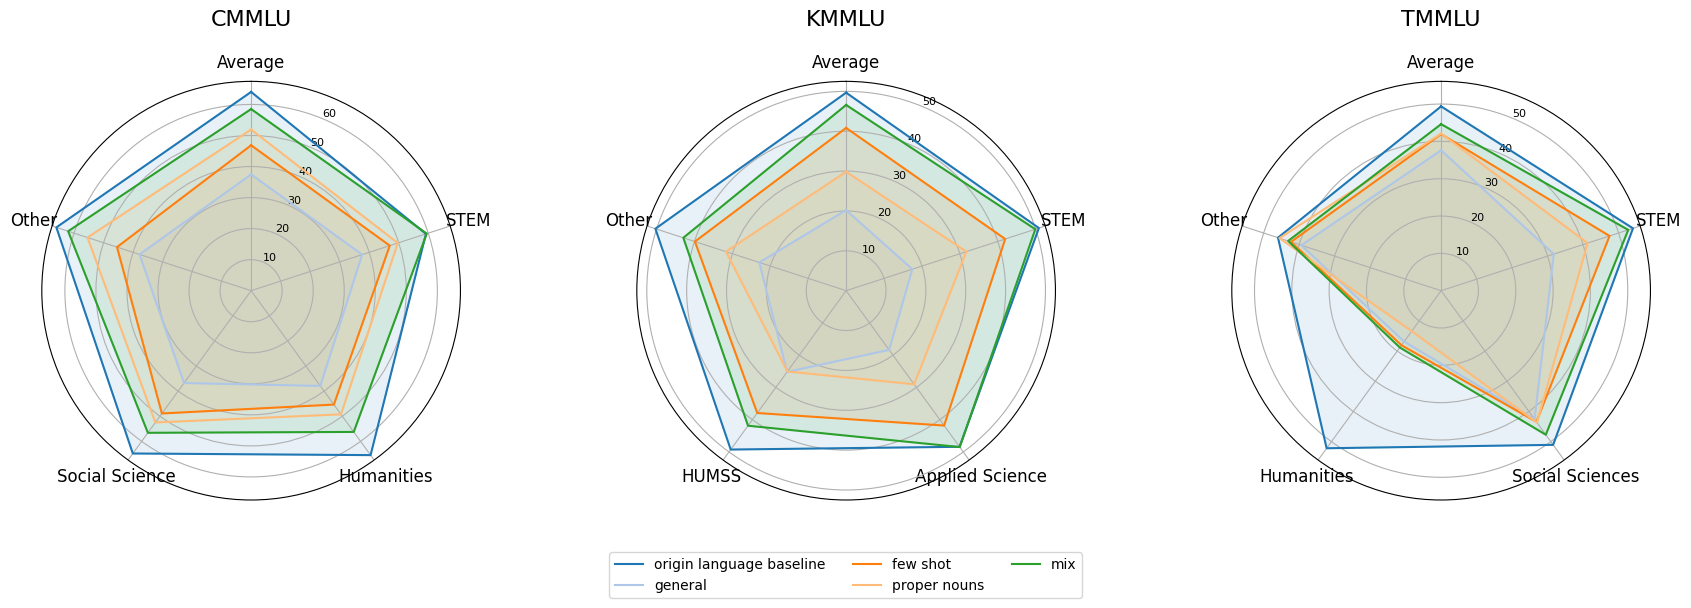

In [19]:
df_list = [
    pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/CMMLU 1cb4c6c313b680ea9164de621bf021d8.csv"),
    pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/KMMLU 1cb4c6c313b6801a8467ebb1229260e3.csv"),
    pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/TMMLU 1c84c6c313b680a5b28def5d35e39a7d.csv")
]

titles = [
    "CMMLU",
    "KMMLU",
    "TMMLU"
]

columns = [
    ["Average", "STEM", "Humanities", "Social Science", "Other"],
    ["Average", "STEM", "Applied Science", "HUMSS", "Other"],
    ["Average", "STEM", "Social Sciences", "Humanities", "Other"]
]
plot_radar_subgraphs(df_list, columns, titles)

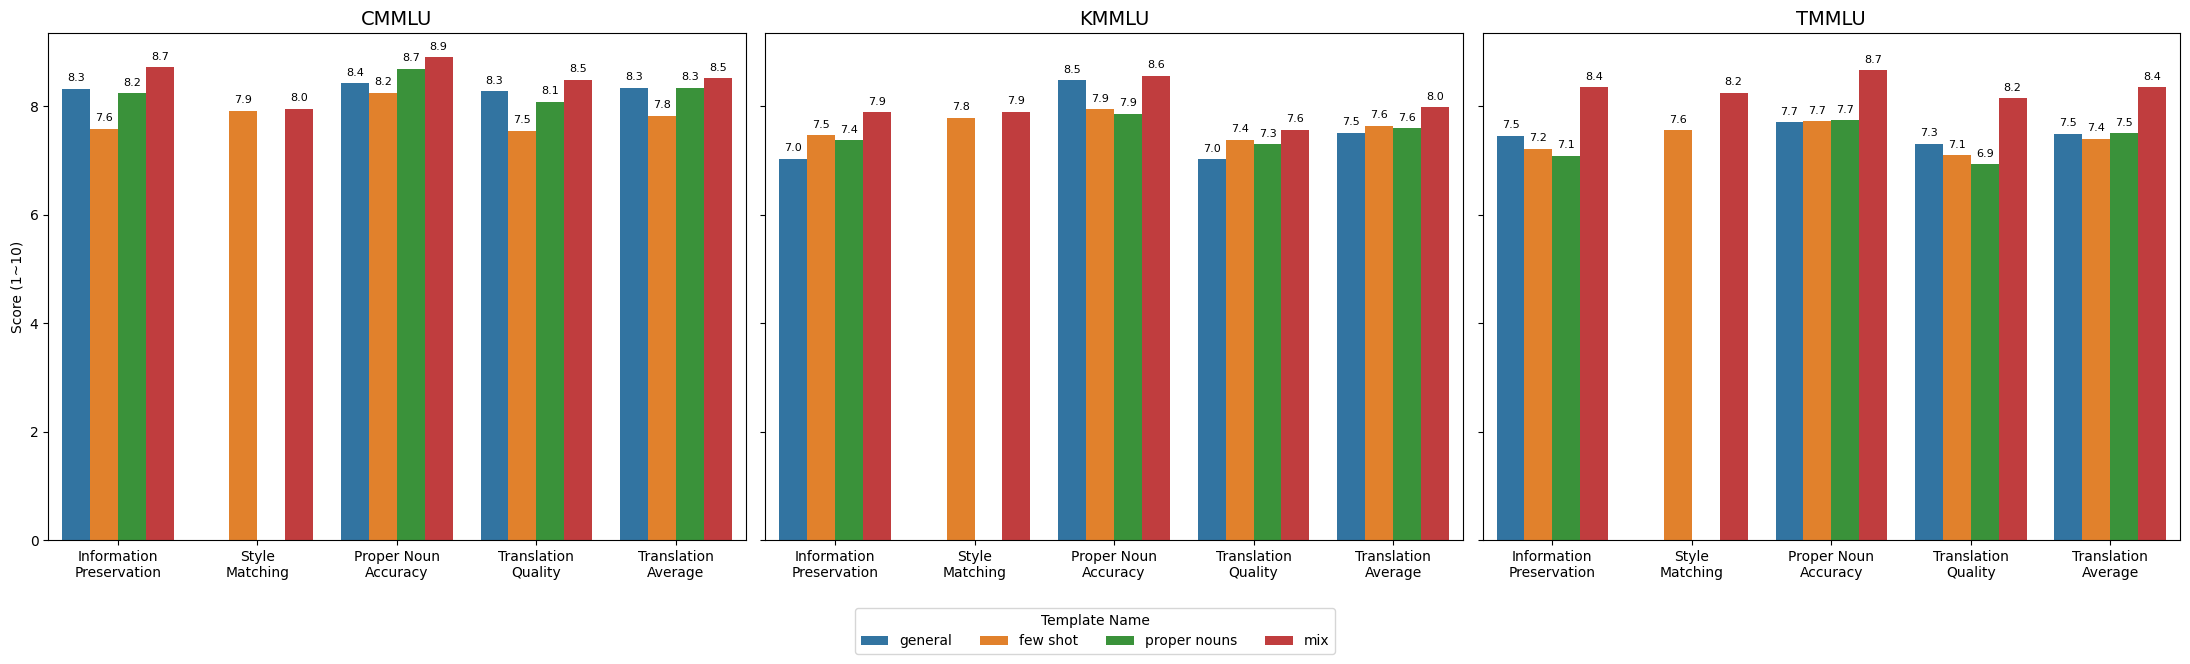

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graph_subplot(df:pd.DataFrame, ax, title):
    df = df.loc[1:5]  # Select top 5 rows
    for idx in range(len(df)):
        if df.loc[idx+1, 'Template Name'] in ['general', 'proper nouns']:
            df.loc[idx+1, '風格匹配度'] = None
            
    translation_metrics = {
        '資訊保留度': 'Information\nPreservation',
        '風格匹配度': 'Style\nMatching',
        '專有名詞準確度': 'Proper Noun\nAccuracy',
        '翻譯品質': 'Translation\nQuality',
        '翻譯平均': 'Translation\nAverage'
    }

    df_melted = df.melt(
        id_vars="Template Name",
        value_vars=translation_metrics.keys(),
        var_name="Metric",
        value_name="Score"
    )
    df_melted["Metric"] = df_melted["Metric"].map(translation_metrics)

    sns.barplot(data=df_melted, x="Metric", y="Score", hue="Template Name", ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Score (1~10)")
    ax.set_xlabel("")

    # Add value labels on bars
    for patch in ax.patches:
        height = patch.get_height()
        if not pd.isna(height) and height != 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                height + 0.1,
                f'{height:.1f}',
                ha='center',
                va='bottom',
                fontsize=8
            )

    ax.tick_params(axis='x', labelrotation=0)
    ax.legend_.remove()  # We'll create one shared legend later

# Load your CSVs
df1 = pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/CMMLU 1cb4c6c313b680ea9164de621bf021d8.csv")
df2 = pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/KMMLU 1cb4c6c313b6801a8467ebb1229260e3.csv")
df3 = pd.read_csv("/work/u5110390/BenchWeaver/logs/csv/TMMLU 1c84c6c313b680a5b28def5d35e39a7d.csv")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

# Plot each one
plot_bar_graph_subplot(df1, axes[0], "CMMLU")
plot_bar_graph_subplot(df2, axes[1], "KMMLU")
plot_bar_graph_subplot(df3, axes[2], "TMMLU")

# Shared title and legend
#fig.suptitle("Translation Metrics by GPT Templates Across Datasets", fontsize=18, y=1.05)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Template Name", loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=5)

plt.tight_layout()
plt.show()


In [ ]:
import json

def load_json_file(file_path):
    """
    Load a JSON file and return its content.
    
    :param file_path: Path to the JSON file.
    :return: Content of the JSON file.
    """
    with open(file_path, 'r') as file:
        return json.load(file)
    
def save_json_file(data, file_path):
    """
    Save data to a JSON file.
    
    :param data: Data to save.
    :param file_path: Path where the JSON file will be saved.
    """
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

In [34]:
from typing import Dict, List

def merge_and_calculate_results(
    question_check_result: Dict[str, List[dict]],
    answer_check_result: Dict[str, List[dict]]
    ):
    score_dict = {
        subj: {
            "question":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            },
            "answer":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            }
        } 
        for subj in question_check_result.keys()
    }
    average_score_dict = {
        "資訊保留度": 0,
        "風格匹配度": 0,
        "專有名詞準確度": 0,
        "翻譯品質": 0,
        "Average": 0,
        "question":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            },
            "answer":{
                "資訊保留度": 0,
                "風格匹配度": 0,
                "專有名詞準確度": 0,
                "翻譯品質": 0,
                "Average": 0
            }
    }
    
    for subj in question_check_result.keys():
        question_record_dict = {
            "資訊保留度": [],
            "風格匹配度": [],
            "專有名詞準確度": [],
            "翻譯品質": []
        }
        answer_record_dict = {
            "資訊保留度": [],
            "風格匹配度": [],
            "專有名詞準確度": [],
            "翻譯品質": []
        }
        for question_result_dict, answer_result_dict in zip(question_check_result[subj], answer_check_result[subj]):
            # append the scores to the record dict
            try:
                question_record_dict["資訊保留度"].append(question_result_dict["資訊保留度"]["分數"])
                question_record_dict["風格匹配度"].append(question_result_dict["風格匹配度"]["分數"])
                question_record_dict["專有名詞準確度"].append(question_result_dict["專有名詞準確度"]["分數"])
                question_record_dict["翻譯品質"].append(question_result_dict["翻譯品質"]["分數"])
                answer_record_dict["資訊保留度"].append(answer_result_dict["資訊保留度"]["分數"])
                answer_record_dict["風格匹配度"].append(answer_result_dict["風格匹配度"]["分數"])
                answer_record_dict["專有名詞準確度"].append(answer_result_dict["專有名詞準確度"]["分數"])
                answer_record_dict["翻譯品質"].append(answer_result_dict["翻譯品質"]["分數"])
                # calculate the average score for each subject
                score_dict[subj]['question']['資訊保留度'] = np.mean(question_record_dict["資訊保留度"])
                score_dict[subj]['question']['風格匹配度'] = np.mean(question_record_dict["風格匹配度"])
                score_dict[subj]['question']['專有名詞準確度'] = np.mean(question_record_dict["專有名詞準確度"])
                score_dict[subj]['question']['翻譯品質'] = np.mean(question_record_dict["翻譯品質"])
                score_dict[subj]['question']['Average'] = np.mean([
                    score_dict[subj]['question']['資訊保留度'],
                    score_dict[subj]['question']['風格匹配度'],
                    score_dict[subj]['question']['專有名詞準確度'],
                    score_dict[subj]['question']['翻譯品質']
                ])
                score_dict[subj]['answer']['資訊保留度'] = np.mean(answer_record_dict["資訊保留度"])
                score_dict[subj]['answer']['風格匹配度'] = np.mean(answer_record_dict["風格匹配度"])
                score_dict[subj]['answer']['專有名詞準確度'] = np.mean(answer_record_dict["專有名詞準確度"])
                score_dict[subj]['answer']['翻譯品質'] = np.mean(answer_record_dict["翻譯品質"])
                score_dict[subj]['answer']['Average'] = np.mean([
                    score_dict[subj]['answer']['資訊保留度'],
                    score_dict[subj]['answer']['風格匹配度'],
                    score_dict[subj]['answer']['專有名詞準確度'],
                    score_dict[subj]['answer']['翻譯品質']
                ])
            except Exception as e:
                print(f"Exception: {e} in subject {subj}")
                print(f"Question result: {question_result_dict}")
                print(f"Answer result: {answer_result_dict}")
                continue
            
    # calculate average score for each subject
    average_score_dict['資訊保留度'] = np.mean(
        [score_dict[subj]['question']['資訊保留度'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['資訊保留度'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["資訊保留度"] = np.mean(
        [score_dict[subj]['question']['資訊保留度'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["資訊保留度"] = np.mean(
        [score_dict[subj]['answer']['資訊保留度'] for subj in score_dict.keys()]
    )
    average_score_dict['風格匹配度'] = np.mean(
        [score_dict[subj]['question']['風格匹配度'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['風格匹配度'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["風格匹配度"] = np.mean(
        [score_dict[subj]['question']['風格匹配度'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["風格匹配度"] = np.mean(
        [score_dict[subj]['answer']['風格匹配度'] for subj in score_dict.keys()]
    )
    average_score_dict['專有名詞準確度'] = np.mean(
        [score_dict[subj]['question']['專有名詞準確度'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['專有名詞準確度'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["專有名詞準確度"] = np.mean(
        [score_dict[subj]['question']['專有名詞準確度'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["專有名詞準確度"] = np.mean(
        [score_dict[subj]['answer']['專有名詞準確度'] for subj in score_dict.keys()]
    )
    average_score_dict['翻譯品質'] = np.mean(
        [score_dict[subj]['question']['翻譯品質'] for subj in score_dict.keys()] + 
        [score_dict[subj]['answer']['翻譯品質'] for subj in score_dict.keys()]
    )
    average_score_dict['question']["翻譯品質"] = np.mean(
        [score_dict[subj]['question']['翻譯品質'] for subj in score_dict.keys()]
    )
    average_score_dict['answer']["翻譯品質"] = np.mean(
        [score_dict[subj]['answer']['翻譯品質'] for subj in score_dict.keys()]
    )
    average_score_dict['Average'] = np.mean([
        average_score_dict['資訊保留度'],
        average_score_dict['風格匹配度'],
        average_score_dict['專有名詞準確度'],
        average_score_dict['翻譯品質']
    ])
    average_score_dict['question']["Average"] = np.mean([
        average_score_dict['question']["資訊保留度"],
        average_score_dict['question']["風格匹配度"],
        average_score_dict['question']["專有名詞準確度"],
        average_score_dict['question']["翻譯品質"]
    ])
    average_score_dict['answer']["Average"] = np.mean([
        average_score_dict['answer']["資訊保留度"],
        average_score_dict['answer']["風格匹配度"],
        average_score_dict['answer']["專有名詞準確度"],
        average_score_dict['answer']["翻譯品質"]
    ])
    
    score_dict.update({"Average": average_score_dict})
    return score_dict

In [37]:
question_check_result = load_json_file("/work/u5110390/BenchWeaver/score/translation_results/kmmlu/mix/question_check_result.json")
answer_check_result = load_json_file("/work/u5110390/BenchWeaver/score/translation_results/kmmlu/mix/answer_check_result.json")

In [ ]:
with open("/work/u5110390/BenchWeaver/score/translation_results/kmmlu/general/score.json", "w") as f:
    json.dump(
        merge_and_calculate_results(
            question_check_result=question_check_result,
            answer_check_result=answer_check_result
        ),
        f,
        indent=4,
        ensure_ascii=False
    )